In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import MeanShift
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ImportError: cannot import name 'show_config'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

AttributeError: module 'numpy' has no attribute '__version__'

In [4]:
df = pd.read_csv("iris.csv")

NameError: name 'pd' is not defined

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

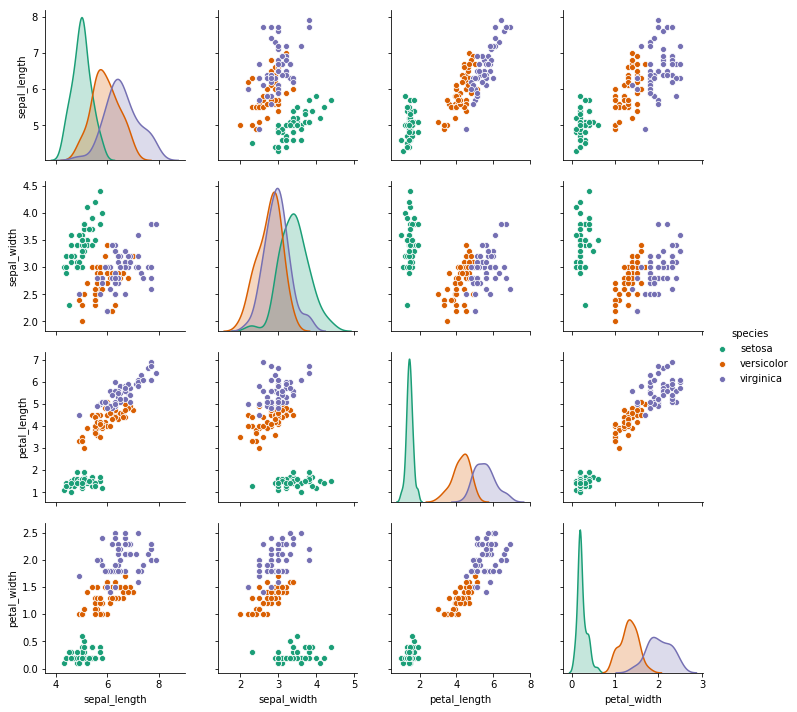

In [6]:
iris = sns.load_dataset('iris')
sns.pairplot(iris,hue='species',palette='Dark2');

In [7]:
X = df[['sepal_length', 'sepal_width', 'petal_length','petal_width']]

In [8]:
X.head()
X.shape

(150, 4)

In [9]:
model_3 = KMeans(n_clusters = 3)
model_2 = KMeans(n_clusters = 2)
scaler = StandardScaler()
norm = QuantileTransformer(output_distribution='normal')

In [10]:
predictions = model_3.fit_predict(X)

In [11]:
df1 = pd.DataFrame({'labels': predictions, 'species': df['species']})

# Create crosstab: ct
ct = pd.crosstab(df1['labels'],df['species'])

In [12]:
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          48         14
1            50           0          0
2             0           2         36


In [13]:
model_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
predictions = model_2.predict(X)

In [15]:
df1 = pd.DataFrame({'labels': predictions, 'species': df['species']})

# Create crosstab: ct
ct = pd.crosstab(df1['labels'],df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          47         50
1            50           3          0


In [45]:
ks = range(1, 8)
inertias_standard = []
inertias_norm = []
X_transform_standard = scaler.fit_transform(X)
X_transform_norm = norm.fit_transform(X)


for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(X_transform_standard)
    inertias_standard.append(model.inertia_)
    model.fit(X_transform_norm)
    inertias_norm.append(model.inertia_)

/home/sinisha/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


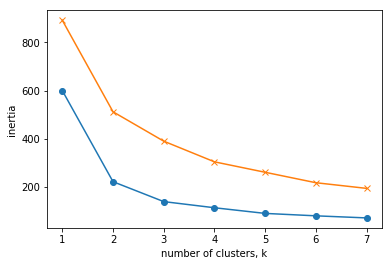

In [46]:
plt.plot(ks, inertias_standard, '-o')
plt.plot(ks, inertias_norm, '-x')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [18]:
pipeline_standart = make_pipeline(scaler, model_3)

In [19]:
pipeline_standart.fit(X)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [20]:
predictions = pipeline_standart.predict(X)

In [21]:
df1 = pd.DataFrame({'labels': predictions, 'species': df['species']})

# Create crosstab: ct
ct = pd.crosstab(df1['labels'],df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          12         36
1            50           0          0
2             0          38         14


In [22]:
pipeline_norm = make_pipeline(norm, model_3)

In [23]:
predictions = pipeline_norm.predict(X)

In [24]:
df1 = pd.DataFrame({'labels': predictions, 'species': df['species']})

# Create crosstab: ct
ct = pd.crosstab(df1['labels'],df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          10         35
1            50           0          0
2             0          40         15


In [25]:
mergings = linkage(X, method = 'complete')
labels = df['species']

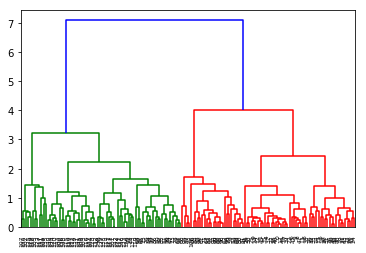

In [26]:
dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()


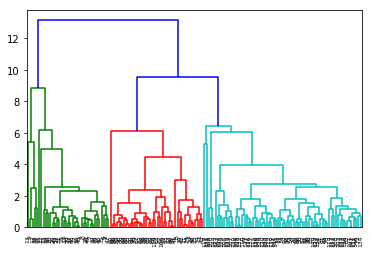

In [27]:
mergings = linkage(X_transform_norm, method = 'complete')
labels = df['species']
dendrogram(mergings, leaf_rotation=90,leaf_font_size=6)
plt.show()

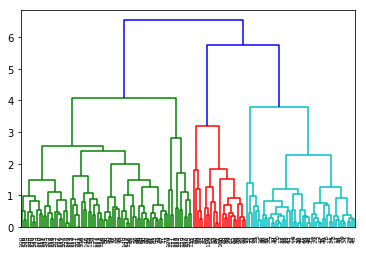

In [28]:
mergings = linkage(X_transform_standard, method = 'complete')
labels = df['species']
dendrogram(mergings, leaf_rotation=90,leaf_font_size=6)
plt.show()

In [29]:
tsne = TSNE(learning_rate = 200)

In [30]:
tsne_features = tsne.fit_transform(X)

In [31]:
xs = tsne_features[:,0]

In [32]:
ys = tsne_features[:,1]

In [33]:
le = LabelEncoder()
df["species_number"] = le.fit_transform(df["species"])

In [34]:
df['species_number']= df['species_number']+1


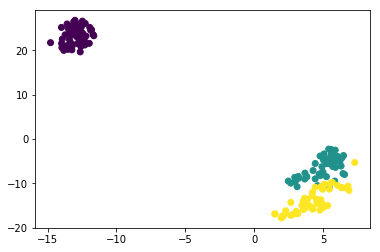

In [35]:
plt.scatter(xs,ys,c=df['species_number'])
plt.show()

In [36]:
pipeline1 = make_pipeline(norm, tsne)

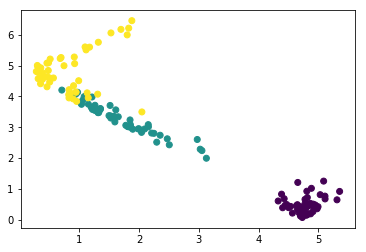

In [37]:
tsne_features = model.fit_transform(X)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs,ys,c=df['species_number'])
plt.show()

In [38]:
model3 = MeanShift()

In [39]:
mean_shift = model3.fit(X)

In [40]:
predictions = model3.labels_
predictions.shape

(150,)

In [41]:
df3 = pd.DataFrame({'labels': predictions, 'species': df['species']})

# Create crosstab: ct
ct3 = pd.crosstab(df3['labels'],df3['species'])
print(ct3)

species  setosa  versicolor  virginica
labels                                
0             0          49         50
1            50           1          0


In [42]:
pipeline3 = make_pipeline(norm, model3)

In [43]:
pipeline3.fit(X)

/home/sinisha/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('meanshift',
                 MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True,
                           min_bin_freq=1, n_jobs=None, seeds=None))],
         verbose=False)

In [44]:
df3 = pd.DataFrame({'labels': predictions, 'species': df['species']})

# Create crosstab: ct
ct3 = pd.crosstab(df3['labels'],df3['species'])
print(ct3)

species  setosa  versicolor  virginica
labels                                
0             0          49         50
1            50           1          0
